we're using the navier stokes equation here however without explicitly simulating pressure. turns out simulating pressure is especially difficult due to... reasons? i think we dont have an easy equation to calculate pressure like we do for other things and it's easier to calculate what pressure should be rather than what it is which is interesting.

so the general idea is using the navier stokes equation but instead of calculating pressure, solve the navier stokes equation ignoring pressure. the result of that equation tells us what our wind movement in x,y looks like. we can then use that info to solve the poisson equation. from my understanding the poisson equations finds us pressure values that would make sense in the context of weather. so for example if theres a lot of wind moving to the right it will assign the right a high pressure value and the surrounding areas lower pressure.

with these "solved for" pressure values, we actually update the x,y wind movement with the pressure values to get a realistic? simulation of wind

In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
timestep = 1
cellSize = 1
gridLength = 32

viscosity = 10**-5
density = 1.2
pressureAlpha = 0.8

In [62]:
def resetWind():
    xWindMovement = np.random.uniform(-1, 1, (gridLength, gridLength))
    yWindMovement = np.random.uniform(-1, 1, (gridLength, gridLength))

    return xWindMovement, yWindMovement

xWindMovement, yWindMovement = resetWind()

# xWindMovement = np.arange(1, 26).reshape(5, 5)
# yWindMovement = np.arange(1, 26).reshape(5, 5)

# xWindMovement = np.random.uniform(-0.1, 0.1, (5, 5))
# yWindMovement = np.random.uniform(-0.1, 0.1, (5, 5))

# x = np.linspace(-1, 1, 5)
# y = np.linspace(-1, 1, 5)
# X, Y = np.meshgrid(x, y)

# xWindMovement = -Y  # Creates a counterclockwise vortex
# yWindMovement = X

In [23]:
def calculateNeighbors(data):
    # easternNeighbor = np.hstack((data[:, 1:], np.zeros((5,1))))
    # westernNeighbor = np.hstack((np.zeros((5,1)), data[:, :-1]))
    # northernNeighbor = np.vstack((np.zeros(5), data[:-1]))
    # southernNeighbor = np.vstack((data[1:], np.zeros(5)))

    # easternNeighbor = np.hstack((data[:, 1:], -data[:, -1].reshape(5,1)))
    # westernNeighbor = np.hstack((-data[:, -1].reshape(5,1), data[:, :-1]))
    # northernNeighbor = np.vstack((-data[-1].reshape(1,5), data[:-1]))
    # southernNeighbor = np.vstack((data[1:], -data[1].reshape(1,5)))

    # wrap around
    easternNeighbor = np.hstack((data[:, 1:], data[:, :1]))
    westernNeighbor = np.hstack((data[:, -1:], data[:, :-1]))
    northernNeighbor = np.vstack((data[-1:], data[:-1]))
    southernNeighbor = np.vstack((data[1:], data[:1]))

    # use boundary velocities
    # easternNeighbor = np.hstack((data[:, 1:], data[:, -1].reshape(-1,1)))
    # westernNeighbor = np.hstack((data[:, 0].reshape(-1,1), data[:, :-1]))
    # northernNeighbor = np.vstack((data[0].reshape(1,-1), data[:-1]))
    # southernNeighbor = np.vstack((data[1:], data[-1].reshape(1,-1)))

    return (northernNeighbor, easternNeighbor, southernNeighbor, westernNeighbor)

def divergence(xVelocity, yVelocity):
    _,e,_,w = calculateNeighbors(xVelocity)
    n,_,s,_ = calculateNeighbors(yVelocity)
    return (e-w)/cellSize*2 + (n-s)/cellSize*2

In [ ]:
# n,e,s,w = calculateNeighbors(xWindMovement)
# xAdvection = -1 * xWindMovement * (e - w)/(2*cellSize) - yWindMovement * (n - s)/(2*cellSize)
# xDiffusion = viscosity * ((e - 2*xWindMovement + w)/(cellSize**2) + (n - 2*xWindMovement + s)/(cellSize**2))
# xPredictedWind = xWindMovement + timestep * (xAdvection + xDiffusion)

# n,e,s,w = calculateNeighbors(yWindMovement)
# yAdvection = -1 * xWindMovement * (e - w)/(2*cellSize) - yWindMovement * (n - s)/(2*cellSize)
# yDiffusion = viscosity * ((e - 2*yWindMovement + w)/(cellSize**2) + (n - 2*yWindMovement + s)/(cellSize**2))
# yPredictedWind = yWindMovement + timestep * (yAdvection + yDiffusion)

In [ ]:
# prevPressure = np.full((5,5), np.inf)
# pressure = np.zeros((5, 5))
# stabalizedThresold = 0.001
# numIters = 0
# while np.abs(pressure - prevPressure).max() > stabalizedThresold:
#     summedNeighborPressure = np.add.reduce(np.array(calculateNeighbors(pressure)))
#     cellDivergence = divergence(xPredictedWind, yPredictedWind)
#     currentPressure = (summedNeighborPressure - cellDivergence)/4

#     prevPressure = pressure
#     pressure = currentPressure
#     numIters += 1

# print(f'After {numIters} iterations...')
# print(pressure)

After 79 iterations...
[[ -51.81513362  -59.30903544  -46.88127949  -15.02611314   78.51319075]
 [-163.952224   -190.54109838 -171.19177932 -125.73785353   83.07819115]
 [-337.45371372 -423.7138497  -407.60950528 -373.81456776  -20.46370233]
 [-532.15035116 -729.2535408  -741.72136429 -781.45018929 -341.12000267]
 [-135.8947598  -465.43041302 -484.57432118 -633.14731738 -512.56664877]]


In [ ]:
# n,e,s,w = calculateNeighbors(pressure)

# xPressureGradient = (e-w)/(2*cellSize)
# yPressureGradient = (n-s)/(2*cellSize)

# # we multiply by timestep to scale the pressure according to timestep - more timesteps passing = greater movement as a result
# # we divide by density to scale the pressure according to how difficult it is to move air. for a very dense substance, it takes greater force, greater pressure to move it compared to low density fluid which will move easily
# xWindMovement = xPredictedWind - timestep/density * xPressureGradient
# yWindMovement = yPredictedWind - timestep/density * yPressureGradient

In [36]:
# def plotData(data1, data2, title1, title2, vmin=None, vmax=None):
#     fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Create 1 row, 2 columns

#     # Determine color scale limits if not provided
#     if vmin is None or vmax is None:
#         vmin = min(np.min(data1), np.min(data2))
#         vmax = max(np.max(data1), np.max(data2))

#     # Plot with consistent color scale
#     im1 = axes[0].imshow(data1, cmap='viridis', vmin=vmin, vmax=vmax)
#     axes[0].set_title(title1)
#     fig.colorbar(im1, ax=axes[0])

#     im2 = axes[1].imshow(data2, cmap='viridis', vmin=vmin, vmax=vmax)
#     axes[1].set_title(title2)
#     fig.colorbar(im2, ax=axes[1])

#     plt.show()

def plotData(xWind, yWind, title='title', vmin=-1, vmax=1):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # X-component heatmap
    im1 = axes[0].imshow(xWind, cmap='RdBu', vmin=vmin, vmax=vmax)
    axes[0].set_title('X Wind')
    fig.colorbar(im1, ax=axes[0])

    # Y-component heatmap
    im2 = axes[1].imshow(yWind, cmap='RdBu', vmin=vmin, vmax=vmax)
    axes[1].set_title('Y Wind')
    fig.colorbar(im2, ax=axes[1])

    # Combined quiver plot
    ny, nx = xWind.shape
    X, Y = np.meshgrid(np.arange(nx), np.arange(ny))

    # axes[2].quiver(X, Y, xWind, yWind, angles='xy', scale_units='xy', scale=1, color='black')
    axes[2].streamplot(X, Y, xWind, yWind, color='black')
    axes[2].set_title(f'{title}\nWind Direction')

    plt.tight_layout()
    plt.show()

In [81]:
def predictWind(xWind, yWind, calculateStr):
    mainWind = xWind if calculateStr == 'x' else yWind
    n, e, s, w = calculateNeighbors(mainWind)

    # Upwind Differencing (prevents unrealistic reversals)
    advection_x = np.where(xWind > 0, -xWind * (mainWind - w) / cellSize, -xWind * (e - mainWind) / cellSize)
    advection_y = np.where(yWind > 0, -yWind * (mainWind - s) / cellSize, -yWind * (n - mainWind) / cellSize)

    diffusion = viscosity * ((e - 2*mainWind + w)/(cellSize**2) + (n - 2*mainWind + s)/(cellSize**2))

    return mainWind + timestep * (advection_x + advection_y + diffusion)

'''
divergence of grid cell tells us how much air is moving IN to the cell vs OUT. for our sim, we want divergence to be 0 meaning that roughly equal amounts of air move in and out. this allows us to say density is the same everywhere
since no cell can have great divergence without high density in that cell

we want to find pressure values such that cells with higher divergence have higher pressure and cells with low divergence has low pressure. this means that cells with high divergence will have high pressure zones
that move to low pressure zones which are low divergence cells. it's a little bit more precise than that since the solve has to exactly find values such that all cells have divergence 0.
'''
# def solvePressure(xWind, yWind):
#     pressure = np.zeros((gridLength, gridLength))
#     max_iters = 500  # Increase iteration count
#     tolerance = 1e-8  # Stricter stopping condition

#     for i in range(max_iters):
#         prevPressure = pressure.copy()
#         cellDivergence = divergence(xWind, yWind)

#         # Gauss-Seidel Iteration (directly modifies pressure)
#         n, e, s, w = calculateNeighbors(pressure)
#         # pressure = 0.25 * (e + w + n + s - cellDivergence)
#         pressure = (1 - pressureAlpha) * pressure + pressureAlpha * (0.25 * (e + w + n + s - cellDivergence))

#         if np.linalg.norm(pressure - prevPressure) < tolerance:
#             break

#         if i % 10 == 0:
#             print(f"Iteration {i}: Max divergence = {np.max(np.abs(cellDivergence))}")


#     return pressure
def solvePressure(cellDivergence):
    pressure = np.zeros((gridLength, gridLength))
    max_iters = 500  # Increase iteration count
    tolerance = 1e-8  # Stricter stopping condition

    for i in range(max_iters):
        prevPressure = pressure.copy()

        # Gauss-Seidel Iteration (directly modifies pressure)
        n, e, s, w = calculateNeighbors(pressure)
        # pressure = 0.25 * (e + w + n + s - cellDivergence)
        pressure = (1 - pressureAlpha) * pressure + pressureAlpha * (0.25 * (e + w + n + s - cellDivergence))

        if np.linalg.norm(pressure - prevPressure) < tolerance:
            break

        if i % 10 == 0:
        #     print(f"Iteration {i}: Max divergence = {np.max(np.abs(cellDivergence))}")
            print(f"Iteration {i}: Max Pressure difference = {np.max(np.abs(pressure - prevPressure))}")

    return pressure


def updateWind(wind, pressure, windStr):
    n,e,s,w = calculateNeighbors(pressure)

    if windStr == 'x':
        pressureGradient = (e-w)/(2*cellSize)
    else:
        pressureGradient = (n-s)/(2*cellSize)

    return wind - (timestep/density) * pressureGradient

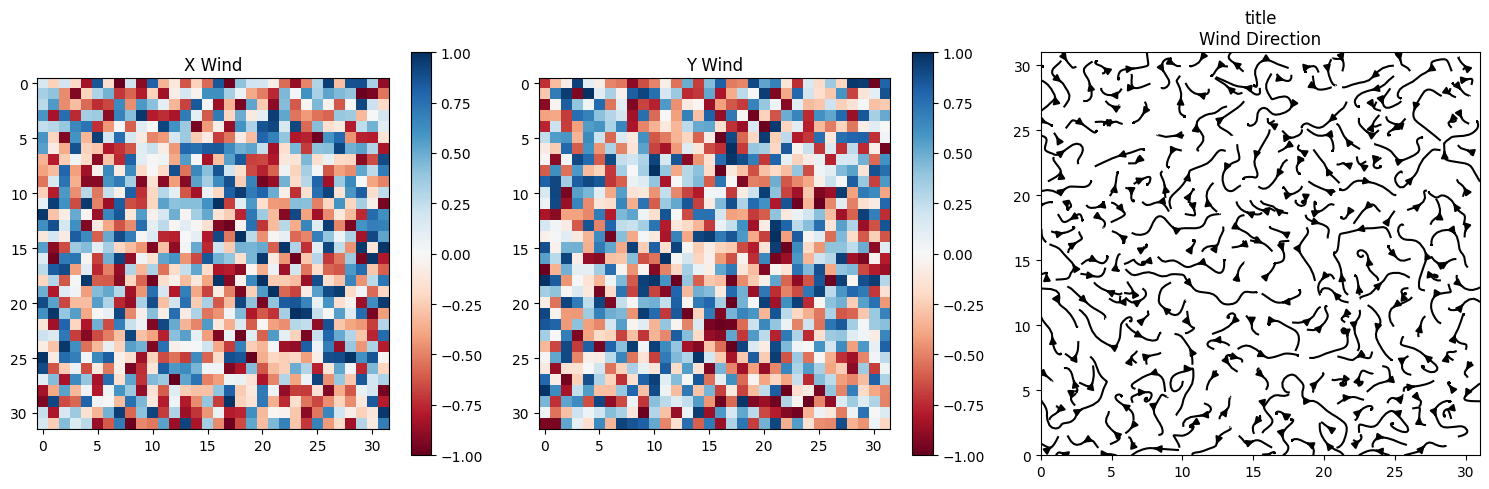

Max divergence: 6.585665986808273
Iteration 0: Max Pressure difference = 1.6255233221991017
Iteration 10: Max Pressure difference = 0.08248939303463043
Iteration 20: Max Pressure difference = 0.047332547334441255
Iteration 30: Max Pressure difference = 0.03194531390353128
Iteration 40: Max Pressure difference = 0.023813660095599598
Iteration 50: Max Pressure difference = 0.018735468298447966
Iteration 60: Max Pressure difference = 0.015289834515026968
Iteration 70: Max Pressure difference = 0.01280265663134772
Iteration 80: Max Pressure difference = 0.010953901727148274
Iteration 90: Max Pressure difference = 0.009549698047183863
Iteration 100: Max Pressure difference = 0.008417781809998193
Iteration 110: Max Pressure difference = 0.007483665513977833
Iteration 120: Max Pressure difference = 0.006698162667009733
Iteration 130: Max Pressure difference = 0.006056663546899266
Iteration 140: Max Pressure difference = 0.005500660934320667
Iteration 150: Max Pressure difference = 0.005009712

In [82]:
xWindMovement, yWindMovement = resetWind()
plotData(xWindMovement, yWindMovement)

for i in range(10):
    div = divergence(xWindMovement, yWindMovement)
    print(f"Max divergence: {np.max(np.abs(div))}")

    xPredictedWind = predictWind(xWindMovement, yWindMovement, 'x')
    yPredictedWind = predictWind(xWindMovement, yWindMovement, 'y')

    pressure = solvePressure(divergence(xPredictedWind, yPredictedWind))

    print(f"Max pressure: {np.max(pressure)}, Min pressure: {np.min(pressure)}")

    xWindMovement = updateWind(xPredictedWind, pressure, 'x')
    yWindMovement = updateWind(yPredictedWind, pressure, 'y')



    # print(f"Max divergence: {np.max(np.abs(divergence(xWindMovement, yWindMovement)))}")
    # print(f"Max pressure: {np.max(pressure)}, Min pressure: {np.min(pressure)}")

    # plotData(xWindMovement, yWindMovement)

In [66]:
yWindMovement

array([[-4.94361762e+163, -4.15785409e+163, -3.38142161e+163, ...,
        -2.74476565e+163, -5.19401585e+163, -5.49057838e+163],
       [-3.09968569e+163, -2.93948675e+163, -2.59803330e+163, ...,
         1.31322286e+163, -1.59686628e+163, -2.81250172e+163],
       [-1.70153607e+163, -1.90267668e+163, -1.86234687e+163, ...,
         2.76028471e+163,  3.18218439e+162, -1.05756368e+163],
       ...,
       [-9.28776143e+163, -6.24812763e+163, -4.31705835e+163, ...,
        -3.91366377e+164, -2.31574262e+164, -1.43288188e+164],
       [-8.76687478e+163, -6.21030831e+163, -4.45619454e+163, ...,
        -2.52658727e+164, -1.80035704e+164, -1.25348695e+164],
       [-7.02100054e+163, -5.36554688e+163, -4.07049315e+163, ...,
        -1.13422139e+164, -1.09100920e+164, -8.99763731e+163]])